In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import numpy as np

In [49]:
#input data

input = "L'_CN-L_IR.csv"

df = pd.read_csv(input, sep=",")
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors="coerce")
df[df.columns[2]] = pd.to_numeric(df[df.columns[2]], errors="coerce")

L_CN = df[df.columns[1]]
L_IR = df[df.columns[2]]

In [50]:
L_CN_us = df[df.columns[1]].iloc[0:6]
L_IR_us = df[df.columns[2]].iloc[0:6]

L_CN_Aalto = df[df.columns[1]].iloc[6:15]
L_IR_Aalto = df[df.columns[2]].iloc[6:15]

In [51]:
#fitting:y=ax+b

a, b = np.polyfit(L_CN, L_IR, 1)

<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\c'
C:\Users\USER\AppData\Local\Temp\ipykernel_23516\4195004842.py:24: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel("L\'$_{CN}$(K$\cdot$km$\cdot$s$^{-1}$$\cdot$pc$^2$)", fontsize=14)


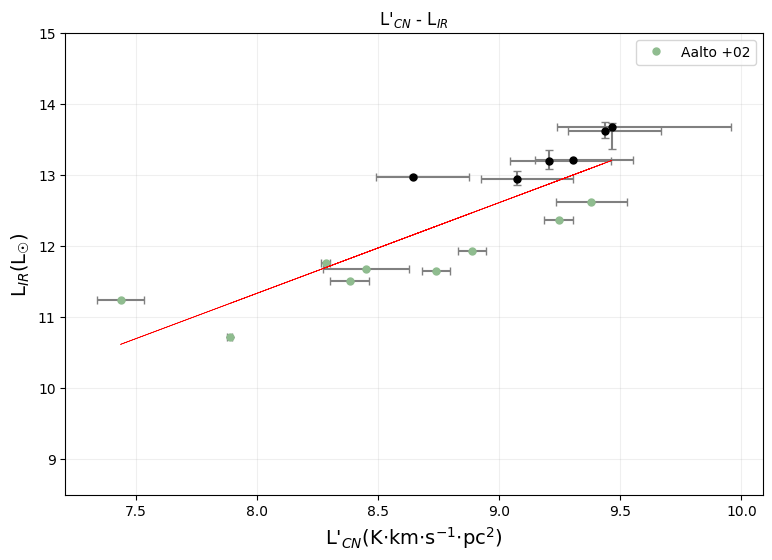

In [52]:
#plot

plt.figure(figsize=(9,6))
plt.title("L\'$_{CN}$ - L$_{IR}$")
#plt.scatter(L_CN, L_IR, color="black", s=10)
x = df['log_L_CN']
y = df['log_L_IR']

xerr = [df['L_CN_err_low'], df['L_CN_err_high']]
yerr = [df['L_IR_err_low'], df['L_IR_err_high']]

plt.errorbar(
    x, y,
    xerr=xerr, yerr=yerr,
    fmt="none",
    capsize=3, color="black", ecolor="gray"
)
plt.plot(L_CN_us, L_IR_us, "o", color="black", markersize=5)
plt.plot(L_CN_Aalto, L_IR_Aalto, "o", color="darkseagreen", markersize=5, label="Aalto +02")
plt.plot(L_CN, a*L_CN + b, "-", lw=0.5, color="red")


plt.ylim(8.5, 15)
plt.xlabel("L\'$_{CN}$(K$\cdot$km$\cdot$s$^{-1}$$\cdot$pc$^2$)", fontsize=14)
plt.ylabel("L$_{IR}$(L$_\u2609$)", fontsize=14)
#plt.xlim(5, 10)
plt.grid(alpha=0.2)


plt.legend()
plt.show()

In [53]:
#fitting:y=ax+b

a_us, b_us = np.polyfit(L_CN_us, L_IR_us, 1)
a_Aalto, b_Aalto = np.polyfit(L_CN_Aalto, L_IR_Aalto, 1)


<>:30: SyntaxWarning: invalid escape sequence '\c'
<>:30: SyntaxWarning: invalid escape sequence '\c'
C:\Users\USER\AppData\Local\Temp\ipykernel_23516\2881519125.py:30: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel("log[L\'$_{CN}$](log[K$\cdot$km$\cdot$s$^{-1}$$\cdot$pc$^2$])", fontsize=14)


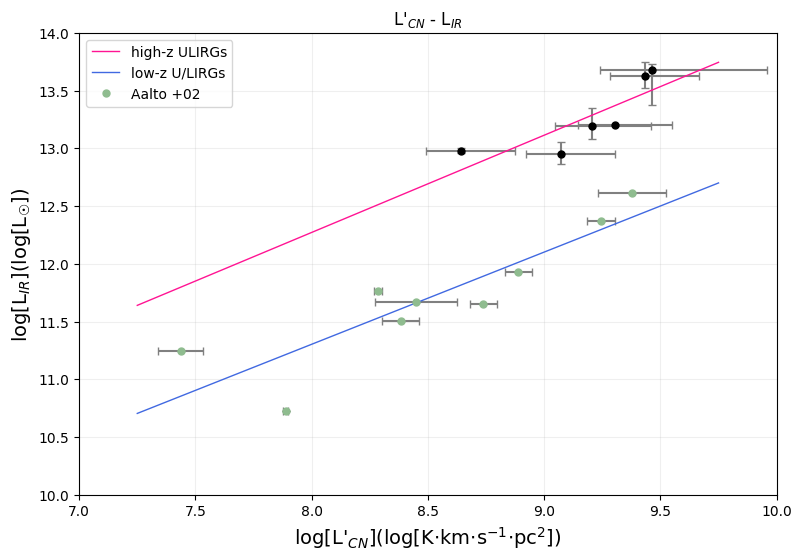

High-z ULIRGs: slope = 0.842, intercept = 5.537
Low-z U/LIRGs (Aalto+02): slope = 0.798, intercept = 4.918


In [54]:
plt.figure(figsize=(9,6))
plt.title("L\'$_{CN}$ - L$_{IR}$")


#x_us = np.linspace(min(L_CN_Aalto), max(L_CN_us), 100)
#x_Aalto = np.linspace(min(L_CN_Aalto), max(L_CN_us), 100)

x_us = np.linspace(7.25, 9.75, 100)
x_Aalto = np.linspace(7.25, 9.75, 100)

x = df['log_L_CN']
y = df['log_L_IR']

xerr = [df['L_CN_err_low'], df['L_CN_err_high']]
yerr = [df['L_IR_err_low'], df['L_IR_err_high']]

plt.errorbar(
    x, y,
    xerr=xerr, yerr=yerr,
    fmt="none",
    capsize=3, color="black", ecolor="gray"
)
plt.plot(x_us, a_us*x_us + b_us, "-", lw=1, color="deeppink", label="high-z ULIRGs")
plt.plot(x_Aalto, a_Aalto*x_Aalto + b_Aalto, "-", lw=1, color="royalblue", label="low-z U/LIRGs")
plt.plot(L_CN_us, L_IR_us, "o", color="black", markersize=5)
plt.plot(L_CN_Aalto, L_IR_Aalto, "o", color="darkseagreen", markersize=5, label="Aalto +02")

plt.ylim(10, 14)
plt.xlim(7., 10)
plt.xlabel("log[L\'$_{CN}$](log[K$\cdot$km$\cdot$s$^{-1}$$\cdot$pc$^2$])", fontsize=14)
plt.ylabel("log[L$_{IR}$](log[L$_\u2609$])", fontsize=14)
plt.grid(alpha=0.2)
plt.legend()
plt.show()

print(f"High-z ULIRGs: slope = {a_us:.3f}, intercept = {b_us:.3f}")
print(f"Low-z U/LIRGs (Aalto+02): slope = {a_Aalto:.3f}, intercept = {b_Aalto:.3f}")
